In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import itertools
sns.set()
plt.style.use('ggplot')


r = requests.get("https://cropapptest.azurewebsites.net/queries/harvests")
df = pd.DataFrame.from_dict(r.json())
df['event_time'] = pd.to_datetime(df['event_time'])
df.head()

,aisle,batch_id,column,crop_yield,event_time,growapp_id,id,name,number_of_trays,over_production,shelf,tray_size,waste_defect,waste_disease,zone
0,E,1,11,6660.0,2022-07-15 12:45:46.343769,f28279e0-d0fd-463f-8455-aeca00d8400f,1,sunflower (micro),5,0.0,4,3.0,0.0,0.0,Farm
1,E,3,11,6004.0,2022-07-15 12:46:07.728404,fa35712f-09ff-4fca-9075-aeca00df2c22,2,sunflower (micro),5,0.0,1,3.0,0.0,0.0,Farm
2,E,4,1,100.0,2022-07-04 11:22:58.712672,d1552a36-e305-4389-8ada-aec200b06062,3,peashoots (babyleaf),5,0.0,4,3.0,0.0,0.0,Farm
3,E,5,1,100.0,2022-07-04 11:23:22.473038,b94ba47a-7e18-4e65-8bb8-aec200b04fd4,4,sunflower (micro),10,100.0,3,3.0,42.5,15.0,Farm
4,C,6,1,0.0,2022-07-04 14:57:55.951670,7ec47783-8c1b-497d-a5f1-aec500dc9f44,5,green mizuna (petite),5,0.0,4,3.0,0.0,100.0,Farm


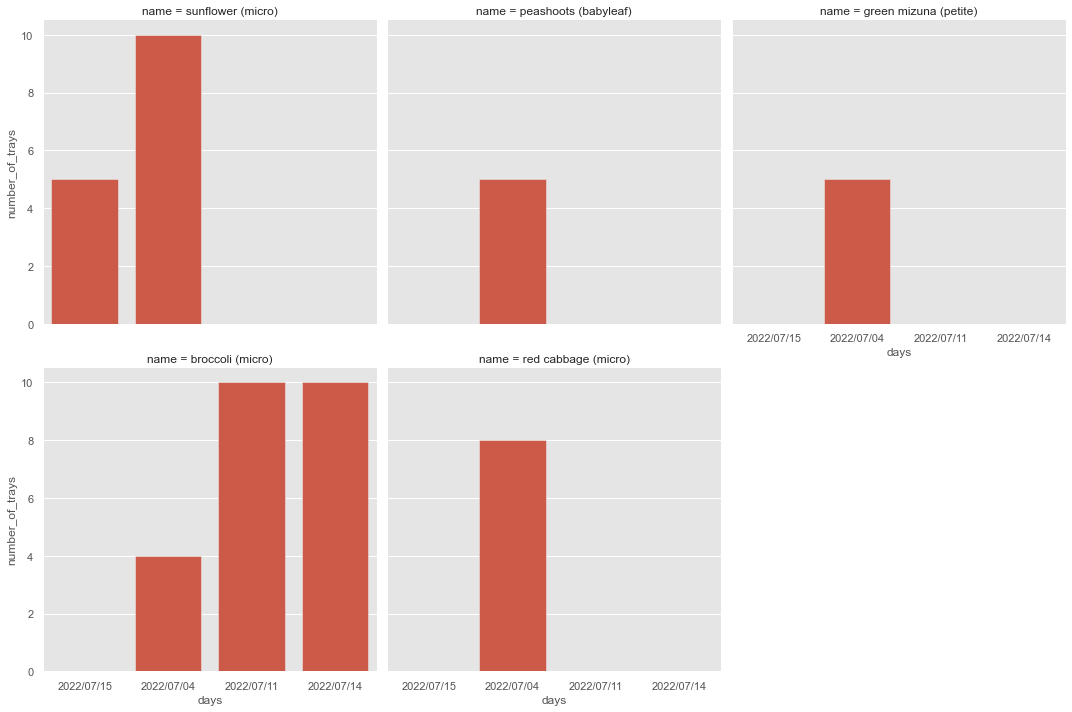

In [2]:
df['days'] = df['event_time'].map(lambda x: x.strftime('%Y/%m/%d'))
palette = itertools.cycle(sns.color_palette())
g = sns.catplot(data=df, x='days', y='number_of_trays', col='name', col_wrap=3, kind='bar', color=next(palette))
